In [27]:
import pandas as pd

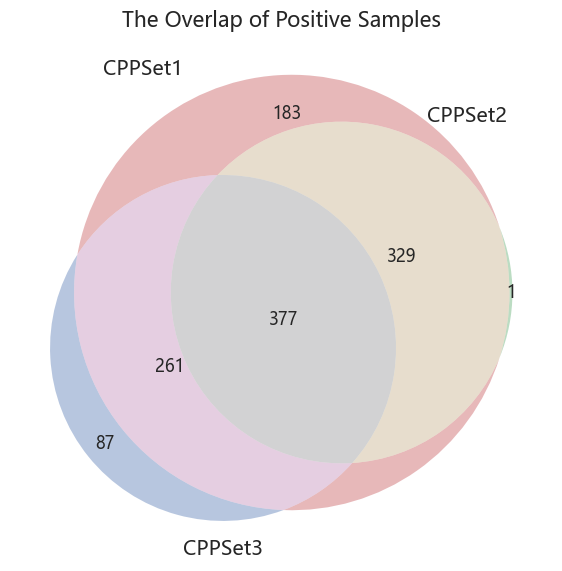

<Figure size 640x480 with 0 Axes>

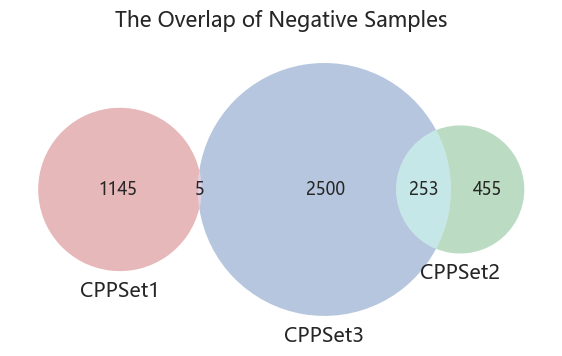

In [31]:
set1_df = pd.read_csv('CPPSet1.csv')
pos_set1_df = set1_df[set1_df['Label']==1]
neg_set1_df = set1_df[set1_df['Label']==0]

for index, row in set1_df.iterrows():
    header = 'CPPSet1_' + str(index+1)   
    with open('CPPSet1_Fasta/' + header + '.fasta', 'w') as fasta_file:
        fasta_file.write(f">{header}\n{row['Sequence']}\n")


set2_df = pd.read_csv('CPPSet2.csv')
pos_set2_df = set2_df[set2_df['Label']==1]
neg_set2_df = set2_df[set2_df['Label']==0]
for index, row in set2_df.iterrows():
    header = 'CPPSet2_' + str(index+1)    
    with open('CPPSet2_Fasta/' + header + '.fasta', 'w') as fasta_file:
        fasta_file.write(f">{header}\n{row['Sequence']}\n")


set3_df = pd.read_csv('CPPSet3.csv')
pos_set3_df = set3_df[set3_df['Label']==1]
neg_set3_df = set3_df[set3_df['Label']==0]
for index, row in set3_df.iterrows():
    header = 'CPPSet3_' + str(index+1)      
    with open('CPPSet3_Fasta/' + header + '.fasta', 'w') as fasta_file:
        fasta_file.write(f">{header}\n{row['Sequence']}\n")




#### 绘制overlap
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# 示例数据：三个数据集的序列ID（可以替换为实际的序列列表）
pos_set1 = set(pos_set1_df['Sequence'].to_list())
pos_set2 = set(pos_set2_df['Sequence'].to_list())
pos_set3 = set(pos_set3_df['Sequence'].to_list())

neg_set1 = set(neg_set1_df['Sequence'].to_list())
neg_set2 = set(neg_set2_df['Sequence'].to_list())
neg_set3 = set(neg_set3_df['Sequence'].to_list())

# 创建三集维恩图
plt.figure(figsize=(7,7))
venn = venn3([pos_set1, pos_set2, pos_set3], ('CPPSet1', 'CPPSet2', 'CPPSet3'))
plt.title("The Overlap of Positive Samples", fontsize=15)
plt.savefig('Positive_Overlap.pdf',bbox_inches='tight',format='pdf',dpi=600)
plt.show()
plt.clf()


plt.figure(figsize=(7,7))
venn = venn3([neg_set1, neg_set2, neg_set3], ('CPPSet1', 'CPPSet2', 'CPPSet3'))
plt.title("The Overlap of Negative Samples", fontsize=15)
plt.savefig('Negative_Overlap.pdf',bbox_inches='tight',format='pdf',dpi=600)
plt.show()



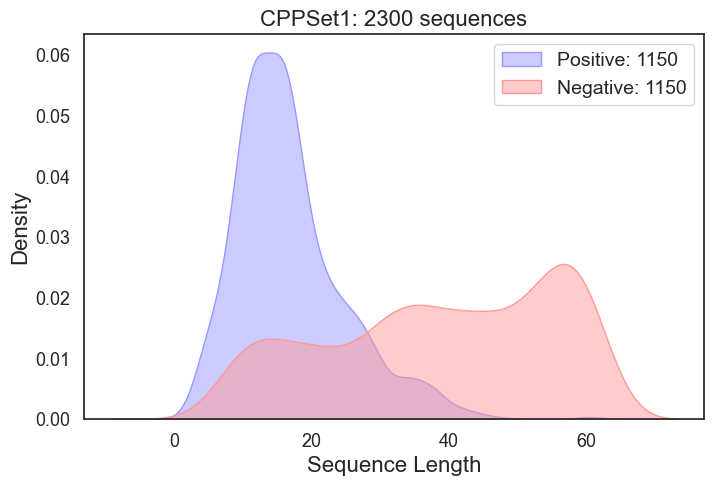

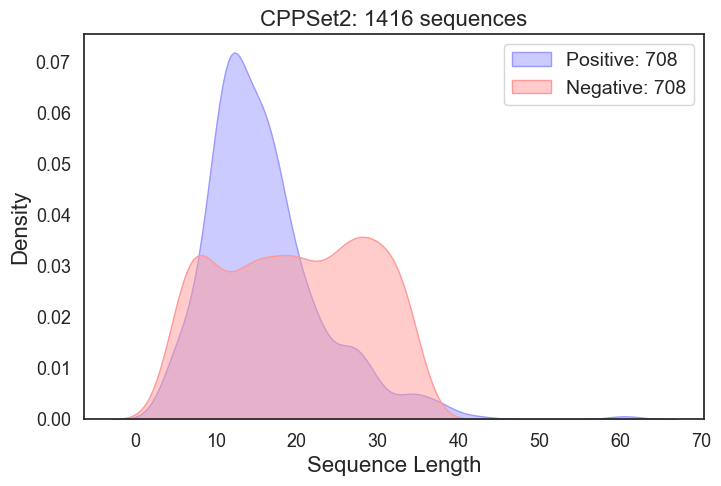

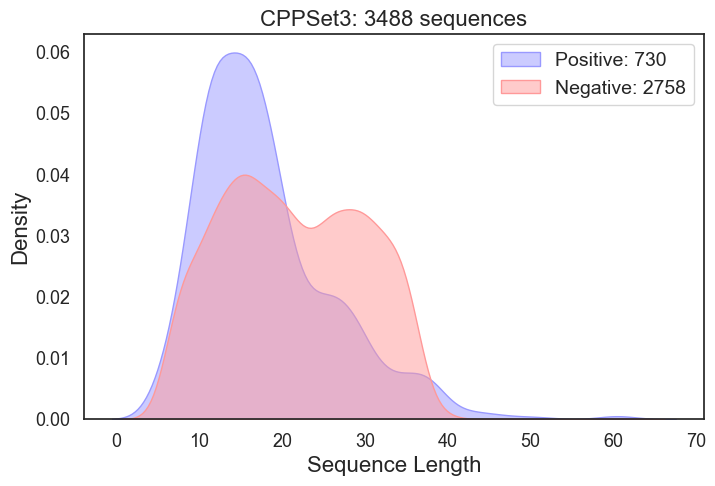

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据：三个数据集的序列长度（替换为实际数据）
pos_set1_len = [len(item) for item in pos_set1_df['Sequence'].to_list()]
pos_set2_len = [len(item) for item in pos_set2_df['Sequence'].to_list()]
pos_set3_len = [len(item) for item in pos_set3_df['Sequence'].to_list()]

neg_set1_len = [len(item) for item in neg_set1_df['Sequence'].to_list()]
neg_set2_len = [len(item) for item in neg_set2_df['Sequence'].to_list()]
neg_set3_len = [len(item) for item in neg_set3_df['Sequence'].to_list()]

# 设置图形风格
sns.set(style="white")

# 绘制 CPPSet1 密度图
plt.figure(figsize=(8, 5))
sns.kdeplot(pos_set1_len, color="#9999FF", fill=True, alpha=0.5, label="Positive: 1150")
sns.kdeplot(neg_set1_len, color="#FF9999", fill=True, alpha=0.5, label="Negative: 1150")
plt.title("CPPSet1: 2300 sequences", fontsize=16)
plt.xlabel("Sequence Length", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=14)
plt.savefig('CPPSet1_Distribution.pdf', bbox_inches='tight',format='pdf',dpi=600)
plt.show()

# 绘制 CPPSet2 密度图
plt.figure(figsize=(8, 5))
sns.kdeplot(pos_set2_len, color="#9999FF", fill=True, alpha=0.5, label="Positive: 708")
sns.kdeplot(neg_set2_len, color="#FF9999", fill=True, alpha=0.5, label="Negative: 708")
plt.title("CPPSet2: 1416 sequences", fontsize=16)
plt.xlabel("Sequence Length", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=14)
plt.savefig('CPPSet2_Distribution.pdf', bbox_inches='tight',format='pdf',dpi=600)
plt.show()

# 绘制 CPPSet3 密度图
plt.figure(figsize=(8, 5))
sns.kdeplot(pos_set3_len, color="#9999FF", fill=True, alpha=0.5, label="Positive: 730")
sns.kdeplot(neg_set3_len, color="#FF9999", fill=True, alpha=0.5, label="Negative: 2758")
plt.title("CPPSet3: 3488 sequences", fontsize=16)
plt.xlabel("Sequence Length", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=14)
plt.savefig('CPPSet3_Distribution.pdf', bbox_inches='tight',format='pdf',dpi=600)
plt.show()


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib


# 定义一个计算氨基酸比例的函数
def calculate_aa_proportion(df):
    sequences = ''.join(df['Sequence'].str.upper())  # 将所有序列合并为一个大的字符串
    aa_counts = Counter(sequences)  # 计算氨基酸字母的出现频率
    aa_df = pd.DataFrame.from_dict(aa_counts, orient='index', columns=['Count'])
    aa_df['Proportion'] = aa_df['Count'] / aa_df['Count'].sum() * 100  # 计算比例
    return aa_df[['Proportion']]

# 计算Positive和Negative序列的氨基酸比例
positive_aa_proportion = calculate_aa_proportion(pos_set1_df)
negative_aa_proportion = calculate_aa_proportion(neg_set1_df)

# 合并两个DataFrame
aa_comparison = pd.concat([positive_aa_proportion.rename(columns={'Proportion': 'Positive Proportion'}),
                           negative_aa_proportion.rename(columns={'Proportion': 'Negative Proportion'})],
                          axis=1)
# aa_comparison.to_excel('CPPSet1_Count.xlsx')
print(aa_comparison.index.to_list())

['F', 'H', 'R', 'M', 'I', 'Y', 'A', 'E', 'S', 'V', 'L', 'P', 'G', 'C', 'T', 'K', 'D', 'W', 'Q', 'N']


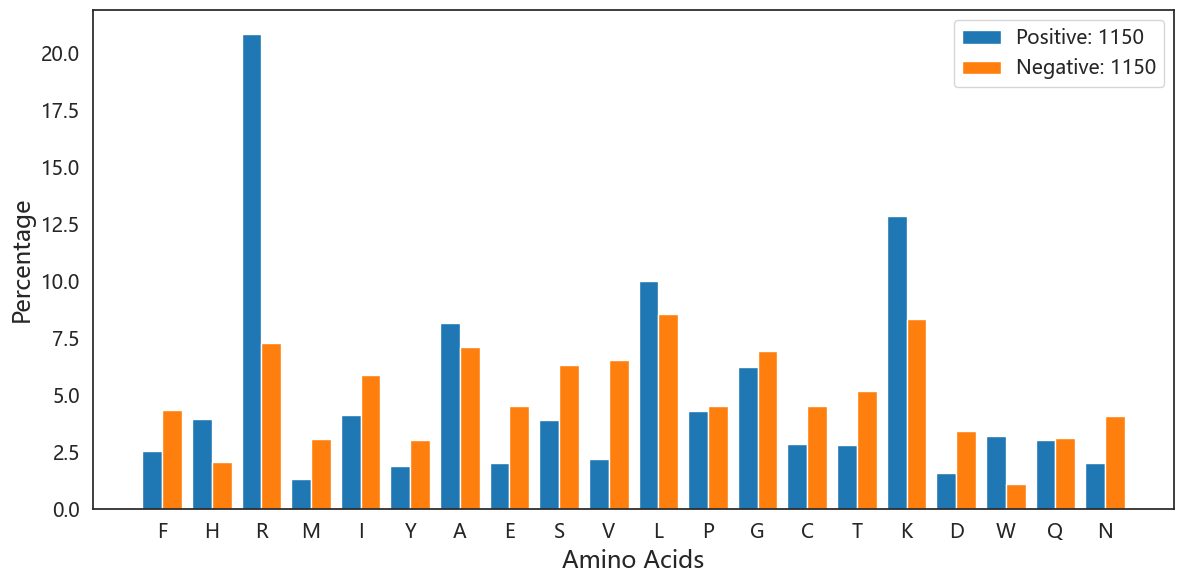

In [46]:

matplotlib.rc("font", family='MicroSoft YaHei')
list1 = aa_comparison['Positive Proportion'].to_list()  # 柱状图第一组数据
list2 = aa_comparison['Negative Proportion'].to_list()  # 柱状图第二组数据
length = len(list1)
x = np.arange(length)   # 横坐标范围
listDate = aa_comparison.index.to_list()

plt.figure(figsize=(12,6))
total_width, n = 0.8, 2   # 柱状图总宽度，有几组数据
width = total_width / n   # 单个柱状图的宽度
x1 = x - width / 2   # 第一组数据柱状图横坐标起始位置
x2 = x1 + width   # 第二组数据柱状图横坐标起始位置

plt.bar(x1, list1, width=width, label="Positive: 1150", color='#1F77B4')
plt.bar(x2, list2, width=width, label="Negative: 1150", color='#FF7F0E')
plt.xlabel("Amino Acids", fontsize=17)   
plt.ylabel("Percentage", fontsize=17)   
plt.xticks(x, listDate,fontsize=14)  
plt.yticks(fontsize=14)
plt.legend(fontsize=14)   
plt.tight_layout()

plt.savefig('CPPSet1_AAC.pdf', bbox_inches='tight',format='pdf',dpi=600)
plt.show()
